## Downloading the data

We´ll download data from the table Posts, which has information about posts and their ratings. We can use SQL query on the following page:

https://data.stackexchange.com/datascience/query/edit/1666037

These are queries that we´ll use.
To download data of 2019 year from the table:
SELECT *
FROM Posts
WHERE CreationDate >= '2019-01-01 00:00:00'
AND CreationDate < '2020-01-01 00:00:00'

To see which tipes of posts there are:
SELECT PostTypeId, COUNT(*) as NrOfPosts
FROM posts
GROUP BY PostTypeId;

## Exploring the data

In [1]:
import pandas as pd
df = pd.read_csv('2019_questions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [2]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


## Cleaning the data

There are missing values in the FavoriteCount column. We´ll substitute them with 0. 

We also will change the type of data in the FavoriteCount column for int and in the CreationDate column for datetime.

Besides we´ll split the strings in the tag column and save them as lists, while eliminating <>.

In [3]:
df['FavoriteCount'].value_counts(dropna=False)

NaN     7432
1.0      953
2.0      205
0.0      175
3.0       43
4.0       12
5.0        8
7.0        4
6.0        4
11.0       1
16.0       1
8.0        1
Name: FavoriteCount, dtype: int64

In [4]:
df['FavoriteCount'].fillna(0, inplace=True)

In [5]:
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

In [6]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [7]:
df['Tags'] = df['Tags'].str.replace("<", "").str.replace(">",",").str[:-1]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


In [9]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


## Most used and most viewed tags

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [10]:
# Count how many times each tag was used 
tags = {}
for value in df['Tags']:
    taglist = value.split(",")
    for tag in taglist:
        if tag in tags:
            tags[tag] += 1
        else: 
            tags[tag] = 1
tags_used = pd.Series(tags).sort_values(ascending=False)
tags_used.head(10)

machine-learning    2693
python              1814
deep-learning       1220
neural-network      1055
keras                935
classification       685
tensorflow           584
scikit-learn         540
nlp                  493
cnn                  489
dtype: int64

In [11]:
# Count how many times a tag was used and a question with each tag was viewed

tags_used = {}
tags_viewed = {}
for tagstring, viewscore in zip(df['Tags'],df['ViewCount']):
    taglist = tagstring.split(",")
    for tag in taglist:
        if tag in tags_used:
            tags_used[tag] += 1                   
            tags_viewed[tag] += viewscore
        else:
            tags_used[tag] = 1
            tags_viewed[tag] = viewscore
tags = pd.DataFrame([pd.Series(tags_used), pd.Series(tags_viewed)]).transpose()
tags.columns = ['used', 'viewed']
tags.head(10)

,used,viewed
machine-learning,2693,388499
data-mining,217,31056
regression,347,49451
linear-regression,175,18978
regularization,50,4941
python,1814,537585
time-series,466,64134
forecast,34,8153
forecasting,85,8797
scikit-learn,540,128110


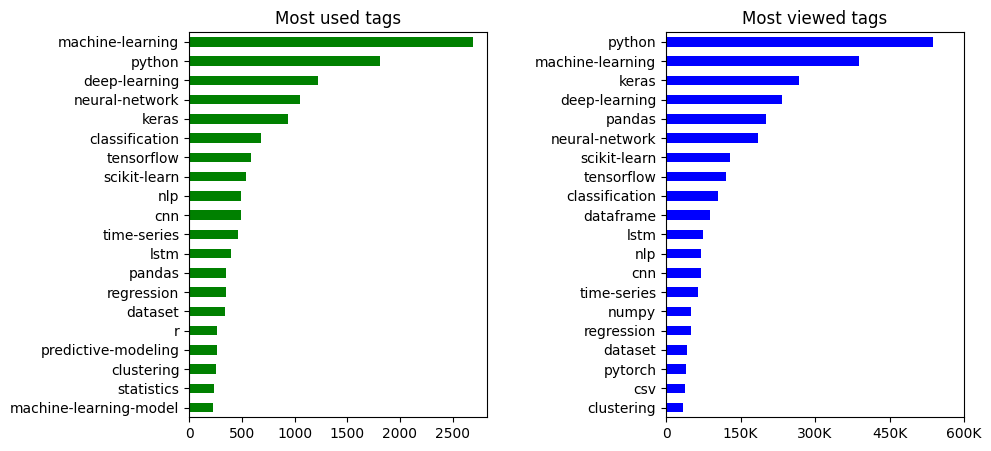

In [12]:
top_used = tags['used'].sort_values(ascending=False).head(20).copy()
top_viewed = tags['viewed'].sort_values(ascending=False).head(20).copy()
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
top_used.sort_values().plot.barh(color='Green')
plt.title('Most used tags')
plt.subplot(1, 2, 2)
top_viewed.sort_values().plot.barh(color='Blue')
plt.title('Most viewed tags')
plt.xticks([0,150000, 300000, 450000, 600000], ['0', '150K','300K', '450K', '600K'])
plt.subplots_adjust(wspace=0.6)
plt.show()

In [13]:
# We´ll see which tags are in top_used but are absent in top_viewed
in_used = pd.merge(pd.DataFrame(top_used), pd.DataFrame(top_viewed), how="left", left_index=True, right_index=True)
in_used

,used,viewed
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [14]:
# We´ll see which tags are in top_viewed but are absent in top_used
in_viewed = pd.merge(pd.DataFrame(top_used), pd.DataFrame(top_viewed), how="right", left_index=True, right_index=True)
in_viewed

,used,viewed
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


Top 10 tags that appear in both lists are: python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn.
The majority of them have to do with deep learning.

But before we decide to recommend to create topics about deep learning, we should check whether this topic is not only temporarly popular (is a fed).

We should investigate the popularity of these tags per time period.

with this qwery we will download data and save it in all_questions.csv
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;

In [15]:
all = pd.read_csv('all_questions.csv')
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21576 non-null  int64 
 1   CreationDate  21576 non-null  object
 2   Tags          21576 non-null  object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [16]:
all.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [17]:
# Transform the Tags column
all['Tags'] = all['Tags'].str.replace("<", "").str.replace(">",",").str[:-1]
all['Tags'].head()

0              python,keras,tensorflow,cnn,probability
1                                       neural-network
2                            python,ibm-watson,chatbot
3                                                keras
4    r,predictive-modeling,machine-learning-model,s...
Name: Tags, dtype: object

Tags of deep learning are: deep-learning, neural-network, keras, tensorflow

In [18]:
all['CreationDate'].min()

'2014-05-13 23:58:30'

In [19]:
all['CreationDate'].max()

'2020-01-19 03:01:03'

In [20]:
all['CreationDate'] = pd.to_datetime(all['CreationDate'])
all['YearMonth'] = all['CreationDate'].dt.year*100+all['CreationDate'].dt.month
all['YearMonth'] = all['YearMonth'].astype(str)
all['YearMonth'].head()

0    201902
1    201902
2    201902
3    201902
4    201902
Name: YearMonth, dtype: object

In [21]:
all['DLQuestion'] = all['Tags'].str.contains('deep-learning|neural-network|keras|tensorflow')
all['DLQuestion'].head()

0     True
1     True
2    False
3     True
4    False
Name: DLQuestion, dtype: bool

In [22]:
dl_questions = all.groupby('YearMonth')['DLQuestion'].sum()
dl_questions.name = 'DL Questions'
dl_questions.head()

YearMonth
201405    1
201406    6
201407    6
201408    1
201409    1
Name: DL Questions, dtype: int64

In [23]:
all_questions = all.groupby('YearMonth')['Id'].count()
all_questions.name= 'Questions'
all_questions.head()

YearMonth
201405    58
201406    99
201407    76
201408    65
201409    48
Name: Questions, dtype: int64

In [24]:
dl_vs_all = pd.concat([dl_questions, all_questions], axis=1)

In [25]:
dl_vs_all.head()

,DL Questions,Questions
YearMonth,,
201405,1,58
201406,6,99
201407,6,76
201408,1,65
201409,1,48


In [26]:
dl_vs_all['DL Ratio'] = round((dl_vs_all['DL Questions']/dl_vs_all['Questions'])*100, 2)
dl_vs_all

,DL Questions,Questions,DL Ratio
YearMonth,,,
201405,1,58,1.72
201406,6,99,6.06
201407,6,76,7.89
201408,1,65,1.54
201409,1,48,2.08
...,...,...,...
201909,204,719,28.37
201910,193,645,29.92
201911,221,667,33.13


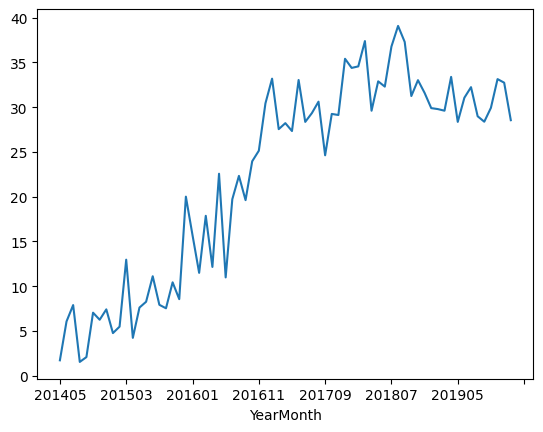

In [27]:
dl_vs_all['DL Ratio'].plot()
plt.show()

We see that the popularity of deep learning tags was growing since 2014, but stabilizing during two or three lost years. Anyway right now it is a very popular topic (30% of all questions are about this topic)

## Conclusion

We should select Deep Learning as a principal topic of our articles.